<a href="https://colab.research.google.com/github/lele25811/Regressione_Lineare/blob/main/Esempio_Regressione_Lineare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# La Regressione Lineare
La regressione lineare è una tecnica statistica e di machine learning utilizzata per modellare la relazione tra una variabile dipendente (`target`) e una o più variabili indipendenti (`features`).

In [65]:
import numpy as np  # per lavorare con array numerici
import pandas as pd   # per la gestione dei dati in formato tabellare
import matplotlib.pyplot as plt   # per la visualizzazione dei grafici
from sklearn.model_selection import train_test_split  # per dividere i dati in set di training e test
from sklearn.linear_model import LinearRegression   # modello di regressione lineare
from sklearn.metrics import mean_squared_error, r2_score  # per valutare le prestazioni del modello

# Regressione Lineare applicata ad un contesto sintetico

## Creazione del Dataset
Per semplicità in questo primo esempio genero un dataset sintetico con una relazione lineare tra una variabile indipendente X e una variabile dipendete Y.

In [66]:
# Creo un dataset sintentico
np.random.seed(42)

# Genero 100 valori casuali per la variabile indipendete (features)
X = 2 * np.random.rand(100, 1) # numeri casuali tra 0 e 2

# Genero i valori della variabile dipendente con una relazione lineare più un po' di rumore
y = 4 + 3 * X + np.random.randn(100, 1) # y = 4 + 3x + rumore

# Converto i dati in un DataFrame pands per la gestion più comoda
df = pd.DataFrame({'X': X.flatten(), 'y': y.flatten()})

# Visualizzo per prime righe  del dataset
df.head()

,X,y
0,0.749080,6.334288
1,1.901429,9.405278
2,1.463988,8.483724
3,1.197317,5.604382
4,0.312037,4.716440


## Visualizzazione e analisi
Visualizzazione e Analisi dei dati per capire meglio la loro distribuzione e relazione.
Creo un grafico a dispersione (`scatter plot`) per visualizzare la relazione tra X (asse x) e y (asse y).
La distribuzione dei punti mostra una chiara relazione lineare con un po' di dispersione dovuta al rumore aggiunto.

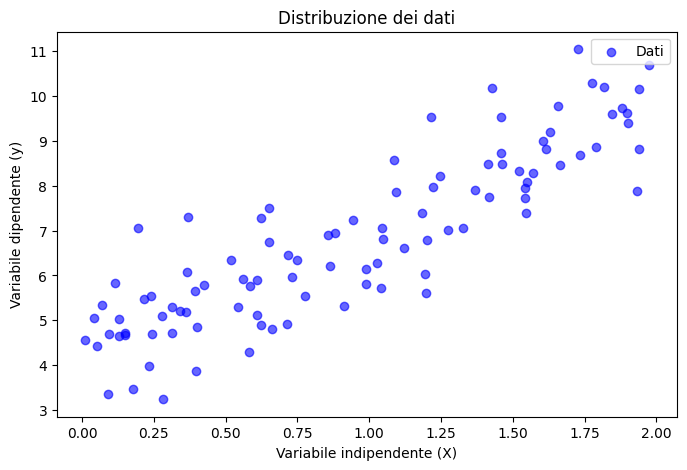

In [67]:
# Visualizziamo i dati con un grafico a dispersione
plt.figure(figsize=(8, 5))
plt.scatter(df["X"], df["y"], color="blue", alpha=0.6, label="Dati")
plt.xlabel("Variabile indipendente (X)")
plt.ylabel("Variabile dipendente (y)")
plt.title("Distribuzione dei dati")
plt.legend()
plt.show()


## Suddivisione dei dati in training e test
Per addestrare il modello in modo efficace dobbiamo suddividere il dataset in:
* Training set (80%): usato per addestrare il modello.
* Test set (20%): usato per valutare le prestazioni del modello su dati nuovi.

In [68]:
# Dividiamo i dati in training set (80%) e test set (20%)

X_train, X_test, y_train, y_test = train_test_split(df[["X"]], df[["y"]], test_size=0.2, random_state=42)

# Verifichiamo la dimensione dei dataset
print(f"Training set: {X_train.shape[0]} campioni")
print(f"Test set: {X_test.shape[0]} campioni")

Training set: 80 campioni
Test set: 20 campioni


## Addestramento del modello di regressione lineare
Possiamo addestrare il modello di `Regression Lineare` usando il dataset di training.

In [69]:
# Creiamo il modello di regressione lineare
modello = LinearRegression()

# Addestriamo il modello sui dati di training
modello.fit(X_train, y_train)

# Stampiamo i coefficienti della retta di regressione
print(f"Intercetta (b0): {modello.intercept_}")
print(f"Coefficiente (b1): {modello.coef_[0]}")

Intercetta (b0): [4.14291332]
Coefficiente (b1): [2.79932366]


Come risultato abbiamo stampato i coefficienti della retta:
* Intercetta (b0): valore di y quando X = 0.
* Coefficiente (b1): pendenza della retta (indica come u cambia quando X aumenta di 1).

## Valutazione delle prestazioni del modello
Per valutare quanto bene il modello ha imparato, useremo due metrice:
* **Errore quadratico medio (mse)**: misura la diffrenza media tra i valori predetti e quelli reali.
* **R^2 (coefficient of determination)**: misura quanto bene il modello spiega la variabilità dei dati.
Un valore di R^2 vicino a 1 indica un modello molto buono.

`modello.predict()`: utilizza il modello per fare delle previsioni sui dati di test


Interpretazione delle metriche:
* **MSE**:
  * Se uguale a 0 il modello è perfetto (mai possibile in pratica).
  * Più basso è l'MSE e meglio è, più alto e peggio è.


Come capire se il nostro MSE è buono?
Dipende dall' unità di misura dei dati.
  * Se stiamo prevedendo prezzi delle case in centinaia di migliaia di dollari, un MSE = 0.5 potrebbe essere ottimo.
  * Se stiamo prevedendo temperatura in gradi, un MSE = 0.5 potrebbe essere alto.

* **R^2**:
  * Se uguale a 1 allora il modello spiega il 100% della variabilità (perfetto, ma quasi impossibile).
  * Se uguale a 0 il modello non spiega nulla, fa previsioni come prendere la media dei dati.
  * Se minore di 0 il modello è peggiore del caso in cui si usa semplicemente la media dei dati (molto male).
  Più vicino a 1, meglio è, significa che il modello spiega bene la relazione tra le variabili.

In [70]:
# Prediciamo i valori di y per i dati di test
y_pred = modello.predict(X_test)

# Calcoliamo l'errore quadratico medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Errore quadratico medio (MSE): {mse}")

# Calcoliamo il coefficiente di determinazione R^2
r2 = r2_score(y_test, y_pred)
print(f"R^2: {r2}")

Errore quadratico medio (MSE): 0.6536995137170021
R^2: 0.8072059636181392


## Visualizzazione dei risultati
Visualizzo i risultati per vedere come le previsioni del modello si confrontano con i dati reali.
Creo un grafico che mostra i punti reali e la retta di regressione lineare.

`plt.scatter(X_test, y_test)`: visualizza i dati reali come punti blu.


`plt.plot(X_test, y_pred)`: traccia la retta di regressione (previsioni del modello) come una linea rossa.


`plt.legend()`: aggiunge la leggenda al grafico.

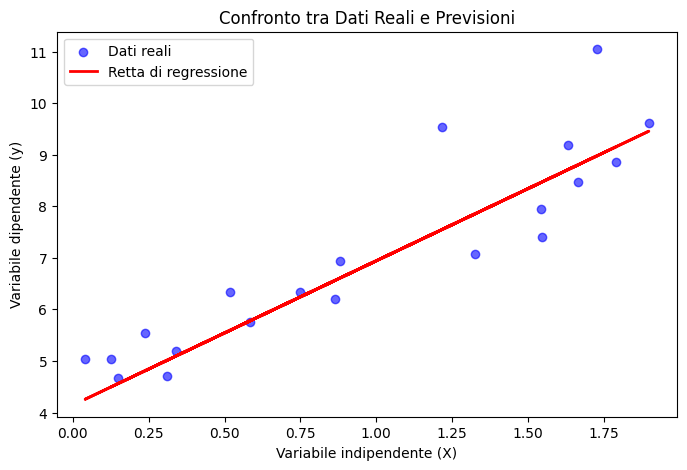

In [71]:
# Creo il grafico con i dati reali e la retta di regressione
plt.figure(figsize=(8, 5))

# Dati reali
plt.scatter(X_test, y_test, color="blue", alpha=0.6, label="Dati reali")

# Predizioni del modello
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Retta di regressione")

# Etichette e titolo
plt.xlabel("Variabile indipendente (X)")
plt.ylabel("Variabile dipendente (y)")
plt.title("Confronto tra Dati Reali e Previsioni")
plt.legend()

# Mostriamo il grafico
plt.show()

# Regressione Lineare applicata ad un contesto reale.
Il dataset utilizzato è quello delle case della California, contiene informazioni sul valore mediano delle abitazioni in base a vari fattori come il numero di stanze, la posizione geografica e altro ancora.

## Caricamente del dataset
Il caricamente del dataset avviene direttamente dalla libreria `sklearn`.

In [72]:
from sklearn.datasets import fetch_california_housing

# Carichiamo il dataset delle case di California
california = fetch_california_housing()

# Creiamo un DataFrame con le feature e il target
df_california = pd.DataFrame(california.data, columns=california.feature_names)
df_california['MEDV'] = california.target  # MEDV: valore medio delle case

# Visualizziamo le prime righe del dataset
df_california.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [73]:
# Numero totale di righe e colonne
df_california.shape

(20640, 9)

## Preprocessamento e esplorazione dei dati
È sempre utile esplorare i dati per comprendere meglio le variabili, identificare eventuali valori mancanti e ottenere un'idea di come sono distribuiti.

In [74]:
# Esploro i dati
print("Statistiche descrittive del dataset:")
print(df_california.describe())  # Statistiche descrittive

print("\nControllo se ci sono valori nulli:")
print(df_california.isnull().sum())

Statistiche descrittive del dataset:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude          MEDV  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.1539

## Visualizzazione dei dati

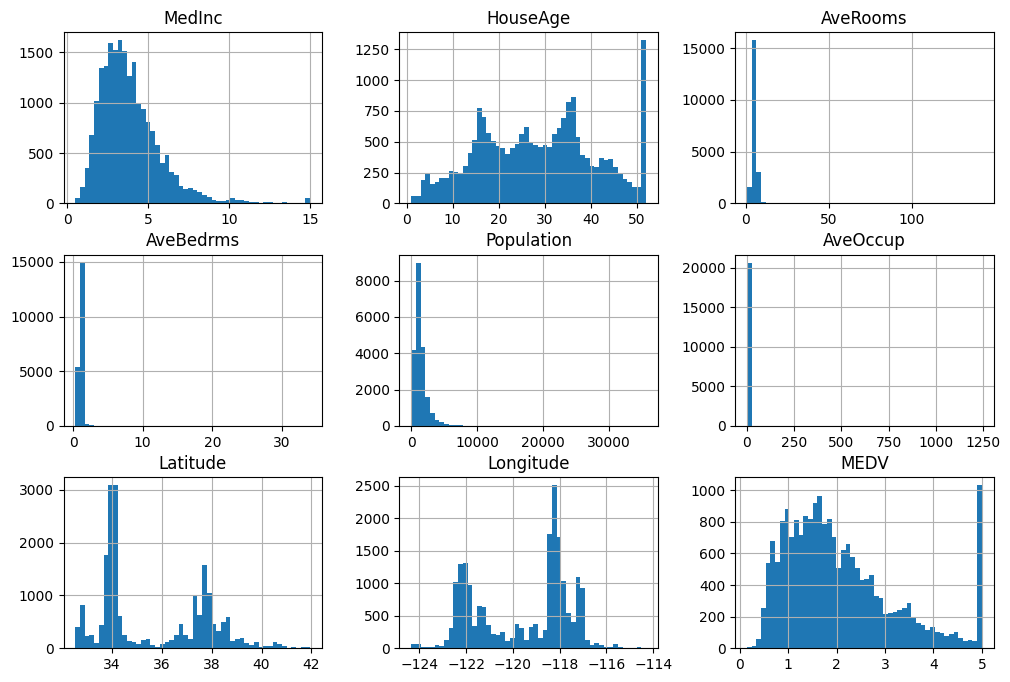

In [75]:
df_california.hist(bins=50, figsize=(12,8))
plt.show()

Visualizzazione della distibuzione delle case sulla mappa della California rispetto alla Latitudine e Longitudine.

## Suddivisione dei dati in training e test.
training set 80%, test set 20%

In [76]:
# Le features sono tutte le colonne tranne il target 'MEDV'
X = df_california.drop(columns=['MEDV'])
# Il target è il valore mediano delle case
y = df_california['MEDV']

#Utilizzo la funzione train_test_split per la suddivisione
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verifica le dimensioni dei dataset
print(f"Training set: {X_train.shape[0]} campioni")
print(f"Test set: {X_test.shape[0]} campioni")

Training set: 16512 campioni
Test set: 4128 campioni


## Addestramento modello
Con l'addestramento del modello troviamo:
* **Intercetta**: valore di y quando tutte le variabili indipendenti sono 0.
* **Coefficienti**: per ogni veriabile indipendente (indicano quanto ogni feature influisce sul prezzo delle case).

In [78]:
# Creiamo il modello di regressione lineare
modello = LinearRegression()

# Addestriamo il modello con i dati di training
modello.fit(X_train, y_train)

# Stampiamo i coefficienti del modello
print("Intercetta (b0):", modello.intercept_)
print("Coefficienti (b1, b2, ...):", modello.coef_)

Intercetta (b0): -37.02327770606409
Coefficienti (b1, b2, ...): [ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]


## Valutazione e verifica del attendibilità del modello

Confronto i valori reali usando un grafico a dispersione:
* Se i punti sono vicini alla linea rossa, il modello è attendibile.
* Se i punto sono sparpaliati senza un chiaro andamento, il modello non sta funzionando bene.

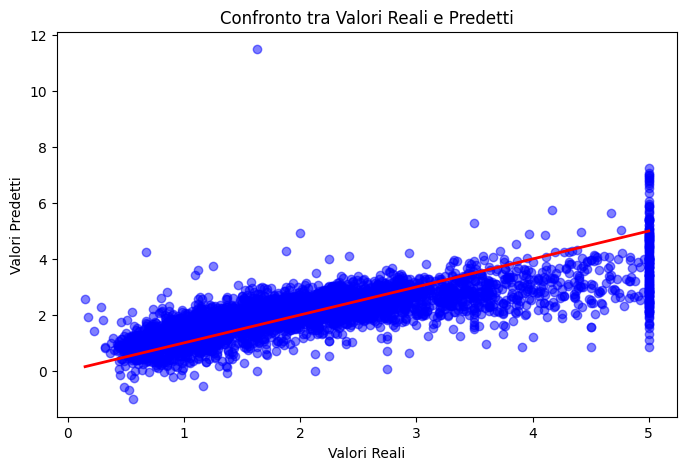

In [80]:
plt.figure(figsize=(8, 5))

# Scatter plot: Valori reali vs Predetti
plt.scatter(y_test, y_pred, color="blue", alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linewidth=2)

# Etichette
plt.xlabel("Valori Reali")
plt.ylabel("Valori Predetti")
plt.title("Confronto tra Valori Reali e Predetti")

plt.show()

**Errore quadratico medio (mse)**: misura la diffrenza media tra i valori predetti e quelli reali.

**R^2 (coefficient of determination)**: misura quanto bene il modello spiega la variabilità dei dati. Un valore di R^2 vicino a 1 indica un modello molto buono.

(Spiegati precedentemente)

In [79]:
# Facciamo le previsioni sui dati di test
y_pred = modello.predict(X_test)

# Calcoliamo l'Errore Quadratico Medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Errore Quadratico Medio (MSE): {mse}")

# Calcoliamo il coefficiente di determinazione R²
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2}")

Errore Quadratico Medio (MSE): 0.5558915986952444
R²: 0.5757877060324508


Analisi degli errori.

Calcolo gli errori tra i valori reali e quelli previsti e li visualizzo con un istogramma:
* Se gli errori sono vicini a 0, significa che il modello sta facendo buone previsioni.
* Se gli errori sono molto distribuiti e lontani da 0, il modello ha problemi di precisione

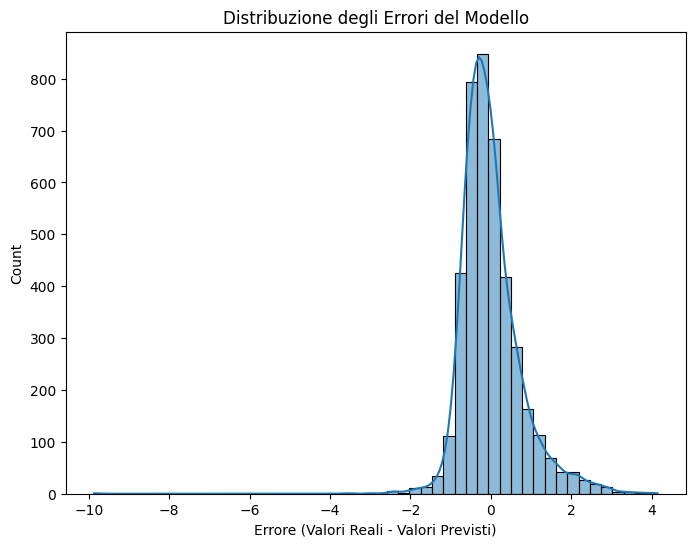

In [109]:
import seaborn as sns

# Valori reali - Valori predetti dal modello
errori = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(errori, bins=50, kde=True)
plt.xlabel("Errore (Valori Reali - Valori Previsti)")
plt.title("Distribuzione degli Errori del Modello")
plt.show()

Analisi dell'importanza delle variabili.

Controllo quali variabili influenzano di più il prezzo.
Se il modello sta dando troppa importanza a variabili poco logiche potrebbe avere problemi.
* Se le variabili logiche come il reddito medio (`MedInc`) e il numero di stanze (`AveRooms`) hanno un alta importanza, il modello ha senso.
* Se il modello si basa su variabili poco rilevanti (es: `Longitude` molto alto), potrebbe avere problemi.

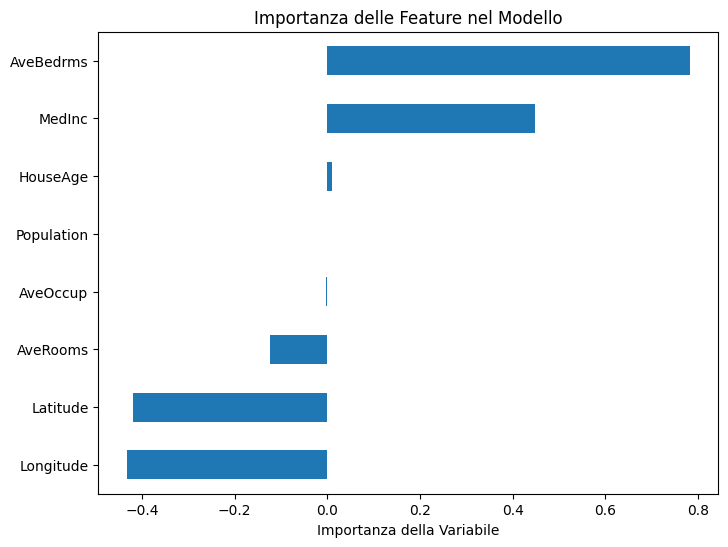

In [111]:
import matplotlib.pyplot as plt

# Otteniamo i coefficienti del modello
importanza_variabili = pd.Series(modello.coef_, index=X.columns)

# Creiamo un grafico
importanza_variabili.sort_values().plot(kind="barh", figsize=(8, 6))
plt.xlabel("Importanza della Variabile")
plt.title("Importanza delle Feature nel Modello")
plt.show()


## Test reale del modello
Creo un campione con le caratteristiche di una casa e suo il modello per predire il prezzo.

In [ ]:
import numpy as np

# Caratteristiche reali di una nuova casa
MedInc = 3.5  # Reddito medio
HouseAge = 25   # Età media delle case
AveRooms = 5.4  #Stanze medie per unità abitativa
AveBedrms = 1.1   # Camere da letto per unità abitativa
Population = 1500   # Popolazione nel blocco residenziale
AveOccup = 3.2  # Occupanti medi per unità abitativa
Latitude = 34.19  # Latitudine
Longitude = -118.45   # Longitudine

# Array delle colonne del DataFrame
feature_names = ["MedInc", "HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup", "Latitude", "Longitude"]

# Definisco i valori di una nuova casa con caratteristiche reali
valori_nuova_casa = np.array([[MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude]])

# Creo un nuovo DataFrame pandas da passare al modello
df_nuova_casa = pd.DataFrame(valori_nuova_casa, columns=feature_names)

# Facciamo la previsione usando il modello già addestrato
prezzo_previsto = modello.predict(df_nuova_casa)

print(f"Il prezzo previsto per la nuova casa è: {prezzo_previsto[0]:.2f} (in centinaia di migliaia di dollari)")

Confronto la previsione del modello sul prezzo della nuova casa con i dati simili nel dataset originale per vedere le il modello è coerente.
Visuallizzo i primi 5 risultati più simili.

In [102]:
import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances

# Definisco i nomi delle colonne come nel dataset originale
feature_names = ["MedInc", "HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup", "Latitude", "Longitude"]

# Creo il DataFrame con il nuovo dato
nuova_casa_df = pd.DataFrame(np.array([[3.5, 25, 5.4, 1.1, 1500, 3.2, 34.19, -118.42]]), columns=feature_names)

# Calcolo la distanza tra la nuova casa e tutte le case del dataset originale
distanze = pairwise_distances(df_california[feature_names], nuova_casa_df)

# Aggiungo le distanze come colonna nel DataFrame originale
df_california["Distanza"] = distanze

# Seleziono le 5 case più simili
case_simili = df_california.nsmallest(5, "Distanza")

# Stampo i dati della nuova casa
print("Nuova casa")
print(df_nuova_casa)

# Stampo i risultati
print("Le 5 case più simili nel dataset originale:")
print(case_simili[["MedInc", "HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup", "Latitude", "Longitude", "MEDV"]])

Nuova casa
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0     3.5      25.0       5.4        1.1      1500.0       3.2     34.19   

   Longitude  
0    -118.45  
Le 5 case più simili nel dataset originale:
       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
11537  2.9250      26.0  4.302752   1.043578      1499.0  3.438073     33.76   
8382   2.8378      25.0  4.099778   1.148559      1498.0  3.321508     33.96   
11386  3.7315      22.0  4.638387   1.048679      1500.0  2.086231     33.65   
5586   5.3106      27.0  5.375723   0.988439      1498.0  2.886320     33.80   
11227  4.9429      28.0  5.839679   0.979960      1500.0  3.006012     33.80   

       Longitude   MEDV  
11537    -118.00  1.760  
8382     -118.36  1.700  
11386    -117.98  1.979  
5586     -118.30  2.683  
11227    -117.94  2.548  
